Before we begin creating our clusters, let us see what value of K parameter is the best option for us. We will use the "elbow method" to find the best K value. The algorithm presented in class, was to loop through each K value iteratively and calculate the cost function. We then graph these values, and where there is an "elbow" we choose our K to be the tip of that elbow. 

Our goal was to accept 3 sensible K values and use them for our clustering script. 
* We began by importing our data.
* We then created two data frames. Both data frames will contain the features we need, but the difference will be that one of these dataframes will be normalized.
* We then ran our iterative loop for K values for both dataframes, saved the K and their corresponding cost values and created a plot to represent them.
* At the end we added the ratios to the normalized dataframe and did the same iterative step.

Let us see the results.

In [5]:
# Import the pacakges we need for this script.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #this is used for plot styling


# Begin by reading the original data.
df1 = pd.read_csv("2018_Financial_Data.csv")

# Create the financial data frame with features taken directly from the real data (df1).
# These features are also included in evaluating ratios but we start by using the raw values.
financial_data = pd.DataFrame(df1, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 

# Get rid of empty values from the date given.
nan_value = float("NaN")
financial_data.replace("", nan_value, inplace=True) #change empty data to nan
financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data.dropna(axis=0, inplace = True) #get rid of nans

# Drop the symbols. If we keep the symbols then KMeans will not work since they are strings.
financial_data = financial_data.drop('Symbol', 1)

# Normalize the financial data.
# Each featrue are in large dollar values, whereas some have variance. We are also going to add the ratios later. 
# Therfore it is a good idea to normalize the data before we do our clustering.
financial_data_norm = pd.DataFrame(preprocessing.normalize(financial_data))
financial_data_norm.columns = ['Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']

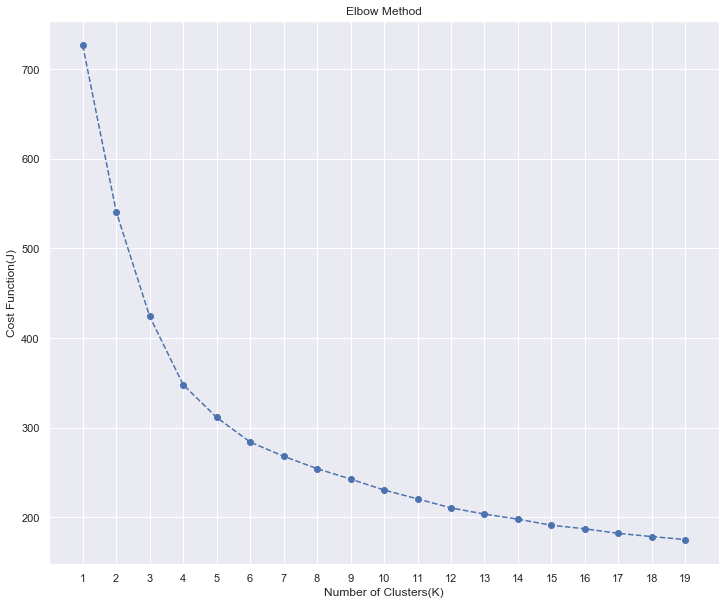

347.93608596908007


In [6]:
# Initialize the score values array and number of clusters for out loop. we used a range of 20 clusters. This should be 
# enough to give us an "elbow"
cost = [0]*19
clusters = range(1, 20)

# Create the iterative loop for changing K values
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :]) #using the normalized data

    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()

print(cost[3])

The cost amount is lower this time due to normalization. However we have a hard time to find our elbow. If we look really closely that at $K=4$ can be a good "elbow".

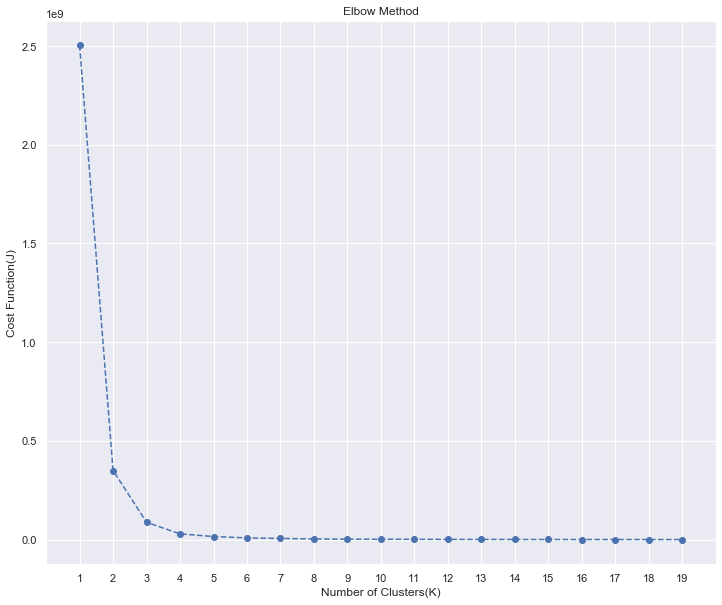

87689817.62949847


In [7]:
# Calculate earnings per share ratio
financial_data_norm['EarningsPerShare'] = (df1['Net Income'] - df1['Preferred Dividends']) / df1['Weighted Average Shs Out']

# Get the P/E ratio directly from data
financial_data_norm['PriceEarningsRatio'] = df1['PE ratio']

# Calculate debt to equity ratio
financial_data_norm['DebtEquityRatio'] = (df1['Short-term debt'] + df1['Long-term debt']) / df1['Total shareholders equity']

# Get the return on equity ratio
financial_data_norm['ReturnOnEquity'] = df1['returnOnEquity']

# Get the quick ratio
financial_data_norm['QuickRatio'] = df1['quickRatio']

# Calculate the working capital ratio
financial_data_norm['WorkingCapitalRatio'] = df1['Total current assets'] / df1['Total current liabilities']

# Get rid of empty values from the date given
nan_value = float("NaN")
financial_data_norm.replace("", nan_value, inplace=True) #change empty data to nan
financial_data_norm.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data_norm.dropna(axis=0, inplace = True) #get rid of nans


# Initialize the score values array and number of clusters for out loop. we used a range of 20 clusters. This should be 
# enough to give us an "elbow"
cost = [0]*19
clusters = range(1, 20)

# Create the iterative loop for changing K values
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :]) #using the normalized data

    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()

print(cost[2])